# Handout 8. Linear models
Many data sets are inherently too complex to be handled adequately by standard procedures and thus require the formulation of ad hoc models. The class of linear models provides a flexible framework into which many — although not all — of these cases can be fitted.

Note: To implement the examples in this handout, we need to install the package `ISwR`.
```
install.packages("ISwR")
```

In [1]:
library(ISwR)

## 1.	Polynomial regression 
One basic observation showing that multiple regression analysis can do more than meets the eye is that you can include second-order and higher powers of a variable in the model along with the original linear term. That is, you can have a model like
$$ y = \alpha + \beta_1 x + \beta_2 x^2 + \dots + \beta_k x^k + \varepsilon$$

This obviously describes a nonlinear relation between $y$ and $x$, but that does not matter; the model is still a linear model.

In [2]:
attach(cystfibr)
summary(lm(pemax~height+I(height^2)))	### Note the output

The following object is masked from package:ISwR:

    tlc




Call:
lm(formula = pemax ~ height + I(height^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-51.411 -14.932  -2.288  12.787  44.933 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 615.36248  240.95580   2.554   0.0181 *
height       -8.08324    3.32052  -2.434   0.0235 *
I(height^2)   0.03064    0.01126   2.721   0.0125 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.18 on 22 degrees of freedom
Multiple R-squared:  0.5205,	Adjusted R-squared:  0.4769 
F-statistic: 11.94 on 2 and 22 DF,  p-value: 0.0003081


In [3]:
pred.frame <- data.frame(height=seq(110,180,2))
lm.pemax.hq <- lm(pemax~height+I(height^2))
predict(lm.pemax.hq,interval="pred",newdata=pred.frame)

,fit,lwr,upr
1,96.90026,37.94461,155.8559
2,94.33611,36.82985,151.8424
3,92.01705,35.73077,148.3033
4,89.94307,34.66449,145.2217
5,88.11418,33.65007,142.5783
6,86.53038,32.70806,140.3527
7,85.19166,31.85979,138.5235
8,84.09803,31.12689,137.0692
9,83.24949,30.53064,135.9683
10,82.64604,30.09150,135.2006


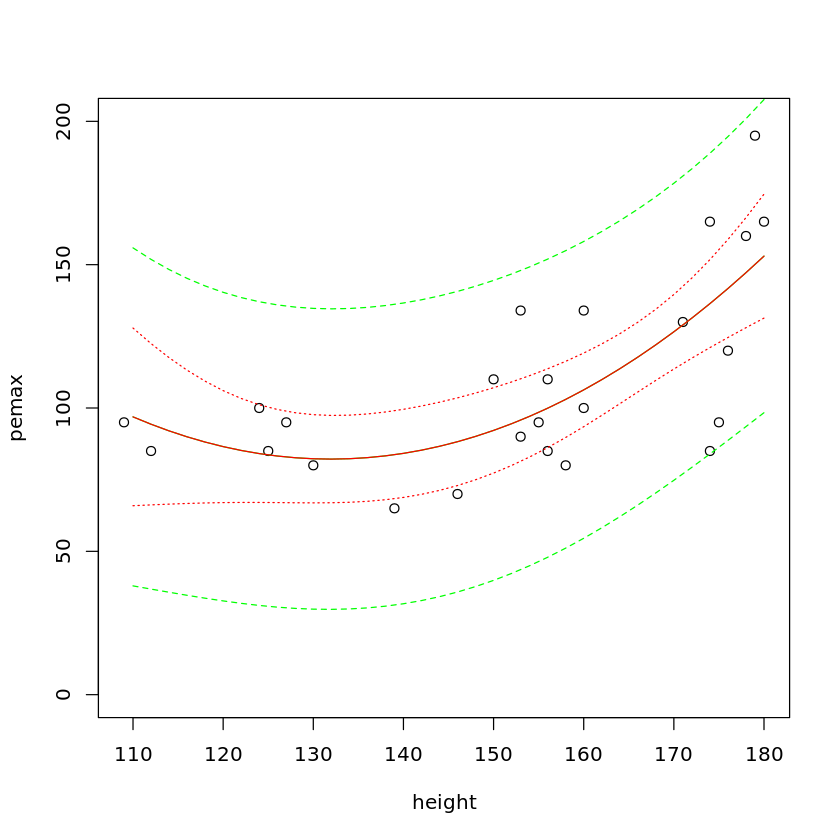

In [4]:
### Based on the predicted data, we have the plot
pp <- predict(lm.pemax.hq,newdata=pred.frame,interval="pred")
pc <- predict(lm.pemax.hq,newdata=pred.frame,interval="conf")
plot(height,pemax,ylim=c(0,200))
matlines(pred.frame$height,pp,lty=c(1,2,2),col="green")
matlines(pred.frame$height,pc,lty=c(1,3,3),col="red")

** Exercise**: For the same dataset, fit the response to a cubic polynomial of the dependent variable. Plot the 95% predicted and confidence bands.

## 2.	Regression through origin 

In [5]:
x <- runif(20)
y <- 2*x+rnorm(20,0,0.3)
summary(lm(y~x))


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53047 -0.20624  0.01266  0.21509  0.65805 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.3107     0.1653   1.879   0.0766 .  
x             1.4658     0.2574   5.694 2.12e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3023 on 18 degrees of freedom
Multiple R-squared:  0.643,	Adjusted R-squared:  0.6232 
F-statistic: 32.42 on 1 and 18 DF,  p-value: 2.121e-05


In [6]:
summary(lm(y~x-1))


Call:
lm(formula = y ~ x - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46094 -0.12153  0.04221  0.22897  0.90038 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x    1.907      0.112   17.02 5.83e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3218 on 19 degrees of freedom
Multiple R-squared:  0.9385,	Adjusted R-squared:  0.9352 
F-statistic: 289.8 on 1 and 19 DF,  p-value: 5.828e-13


In [7]:
anova(lm(y~x))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x,1,2.963471,2.96347071,32.42388,2.120825e-05
Residuals,18,1.645160,0.09139779,NA,NA


## 3.	Design matrices and dummy variables 
The function `model.matrix` gives the design matrix for a given model. It can look like this:

In [8]:
model.matrix(pemax~height+weight)

,(Intercept),height,weight
1,1,109,13.1
2,1,112,12.9
3,1,124,14.1
4,1,125,16.2
5,1,127,21.5
6,1,130,17.5
7,1,139,30.7
8,1,150,28.4
9,1,146,25.1
10,1,155,31.5


If the same is attempted for a model containing a factor, the following happens.

In [9]:
attach(red.cell.folate)
model.matrix(folate~ventilation)

,(Intercept),"ventilationN2O+O2,op","ventilationO2,24h"
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,1,0
10,1,1,0


The two columns of zeros and ones are sometimes called *dummy variables*. They are interpreted exactly as above: Multiplying them by the respective regression coefficients and adding the results yields the fitted value.

## 4.	Linearity over groups 
Sometimes data are grouped according to a division of a continuous scale (e.g., by age group), or an experiment was designed to take several measurements at each of a fixed set of $x$-values. In both cases it is relevant to compare the results of a linear regression with those of an analysis of variance.

We thus have two alternative models for the same data. Both belong to the class of linear models that lm is capable of handling. The linear regression model is a submodel of the model for one-way analysis of variance because the former can be obtained by placing restrictions on the parameters of the latter (namely that the true group means lie on a straight line). It is possible to test whether or not a model reduction is allowable by comparing the reduction in the amount of variation explained to the residual variation in the larger model, resulting in an F test.

In the following example, notice that the variable `grp` is a numeric vector, and the variable `grpf` is a factor with six levels.

In [10]:
attach(fake.trypsin)
summary(fake.trypsin)

    trypsin            grp        grpf   
 Min.   :-39.96   Min.   :1.000   1: 32  
 1st Qu.:119.52   1st Qu.:2.000   2:137  
 Median :167.59   Median :2.000   3: 38  
 Mean   :168.68   Mean   :2.583   4: 44  
 3rd Qu.:213.98   3rd Qu.:3.000   5: 16  
 Max.   :390.13   Max.   :6.000   6:  4  

In [11]:
anova(lm(trypsin~grpf))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
grpf,5,224103.1,44820.614,13.50829,9.591749e-12
Residuals,265,879271.9,3318.007,NA,NA


In [12]:
anova(lm(trypsin~grp))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
grp,1,206698.4,206698.40,62.00883,8.451137e-14
Residuals,269,896676.6,3333.37,NA,NA


Notice that the residual mean squares did not change very much, indicating that the **two models describe the data nearly equally well**. If you want to have a formal test of the simple linear model against the model where there is a separate mean for each group, it can be done easily as follows:

In [13]:
model1 <- lm(trypsin~grp)
model2 <- lm(trypsin~grpf)
anova(model1,model2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
269,896676.6,NA,NA,NA,NA
265,879271.9,4,17404.67,1.31138,0.2660543


So we see that the model reduction has a nonsignificant p-value and hence that model2 does not fit data significantly better than model1. --- This technique works only when one model is a submodel of the other, which is the case here since the linear model is defined by a restriction on the group means.

Another way to achieve the same result is to add the two models together formally as follows:

In [14]:
anova(lm(trypsin~grp+grpf))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
grp,1,206698.40,206698.401,62.29595,7.832995e-14
grpf,4,17404.67,4351.167,1.31138,2.660543e-01
Residuals,265,879271.91,3318.007,NA,NA


## 5.	Interactions
A basic assumption in a multiple regression model is that terms act additively on the response. However, this does not mean that linear models cannot describe nonadditivity. You can add special interaction terms that specify that the effect of one term is modified according to the level of another. In the model formulas in R, *such terms are generated using the colon operator*; for example, a:b. Usually, you will also include the terms a and b, and R allows the notation a*b for a+b+a:b. Higher-order interactions among three or more variables are also possible.

Depending on the nature of the terms a and b as factors or numeric variables, the overall effect of including interaction terms can be described as follows:

 1.	**Interaction between two factors**. This is conceptually the simplest case. The model with interaction corresponds to having different levels for all possible combinations of levels of the two factors.
 2.	**Interaction between a factor and a numeric variable**. In this case, the model with interaction contains linear effects of the continuous variable but with different slopes within each group defined by the factor.
 3.	** Interaction between two continuous variables**. This gives a slightly peculiar model containing a new regression variable that is the product of the two. The interpretation is that you have a linear effect of varying one variable while keeping the other constant, but with a slope that changes as you vary the other variable.